In [1]:
CHALLENGE = "antiviral-admet-2025"  # or: "antiviral-potency-2025"

Make sure you log in: 

    (polaris) ➜  polaris_challenge git:(admeteda) ✗ polaris login
    
    [2025-01-30 16:10:50] INFO  Your browser has been opened to visit: 
                                https://clerk.polarishub.io/oauth/....
                                
    Please enter the authorization token: xxx
    
    [2025-01-30 16:10:57] INFO     Successfully authenticated to the Polaris Hub as `lex.e.obrien@gmail.com`! 🎉
                          INFO     You are successfully logged in to the Polaris Hub.  

                        


In [1]:
import polaris as po
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
competition = po.load_competition(f"asap-discovery/{CHALLENGE}")
# competition = po.load_dataset('admet/data/data.zarr')

/Users/robertarbon/mamba/envs/polaris/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'CHALLENGE' is not defined

In [2]:
competition.cache()


NameError: name 'competition' is not defined

In [12]:
train, test = competition.get_train_test_split()

In [13]:
train = train.as_dataframe()
train

,CXSMILES,HLM,MDR1-MDCKII,KSOL,MLM,LogD
0,COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...,NaN,2.0,NaN,NaN,0.3
1,O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...,NaN,0.2,333.0,NaN,2.9
2,O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...,NaN,0.5,NaN,NaN,0.4
3,NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...,NaN,8.5,376.0,NaN,1.0
4,CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|,NaN,0.9,375.0,NaN,-0.3
...,...,...,...,...,...,...
429,CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|,25.5,NaN,NaN,63.0,NaN
430,O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl,216.0,NaN,NaN,386.0,NaN
431,NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1,NaN,NaN,NaN,NaN,2.0
432,COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1,NaN,NaN,NaN,NaN,2.9


## What is the range of data? 

In [14]:
train.describe()

,HLM,MDR1-MDCKII,KSOL,MLM,LogD
count,301.000000,425.000000,365.000000,303.000000,352.000000
mean,124.250432,4.646606,212.755342,176.895215,2.205085
std,217.050726,6.433744,157.678018,318.479175,1.228092
min,0.000000,0.000000,2.000000,0.000000,-0.700000
25%,16.500000,0.900000,29.000000,26.250000,1.400000
50%,48.000000,1.850000,239.000000,72.500000,2.200000
75%,119.000000,5.060000,374.000000,185.000000,3.000000
max,1620.000000,35.700000,398.000000,2380.000000,4.500000


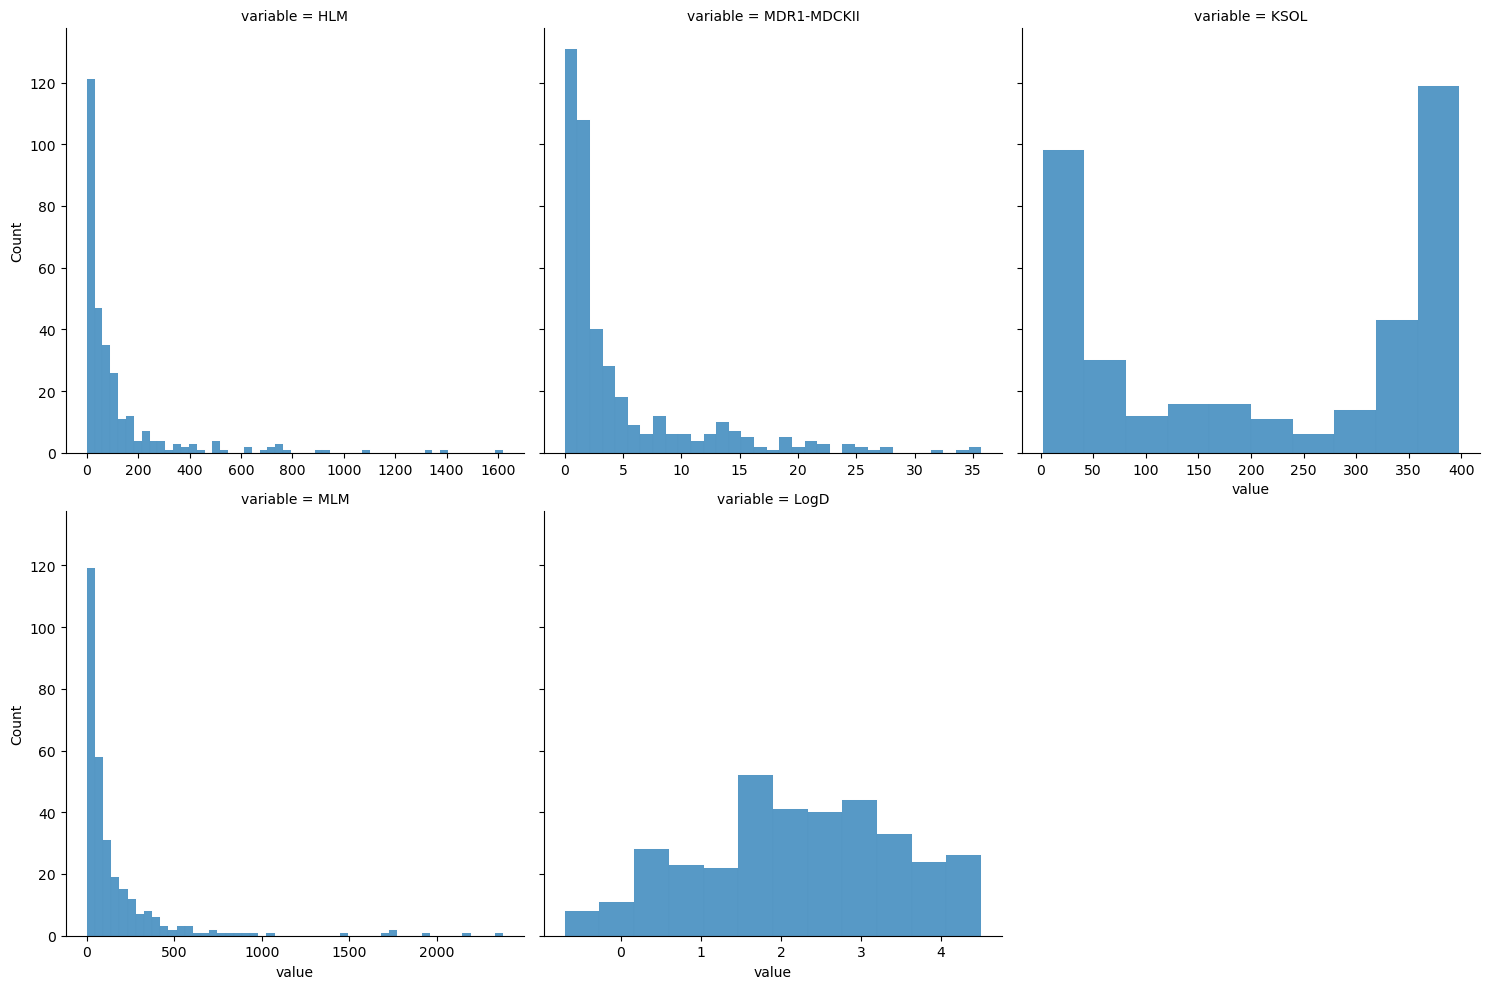

In [15]:
sns.displot(data=train.melt(id_vars='CXSMILES'), x='value', col='variable', 
            common_bins=False,
            facet_kws={'sharex': False}, 
           col_wrap=3)

In [16]:
train.columns
for col in ['MDR1-MDCKII', 'MLM', 'KSOL', 'HLM']: 
    train[f'log{col}'] = np.log(train[col]+1)

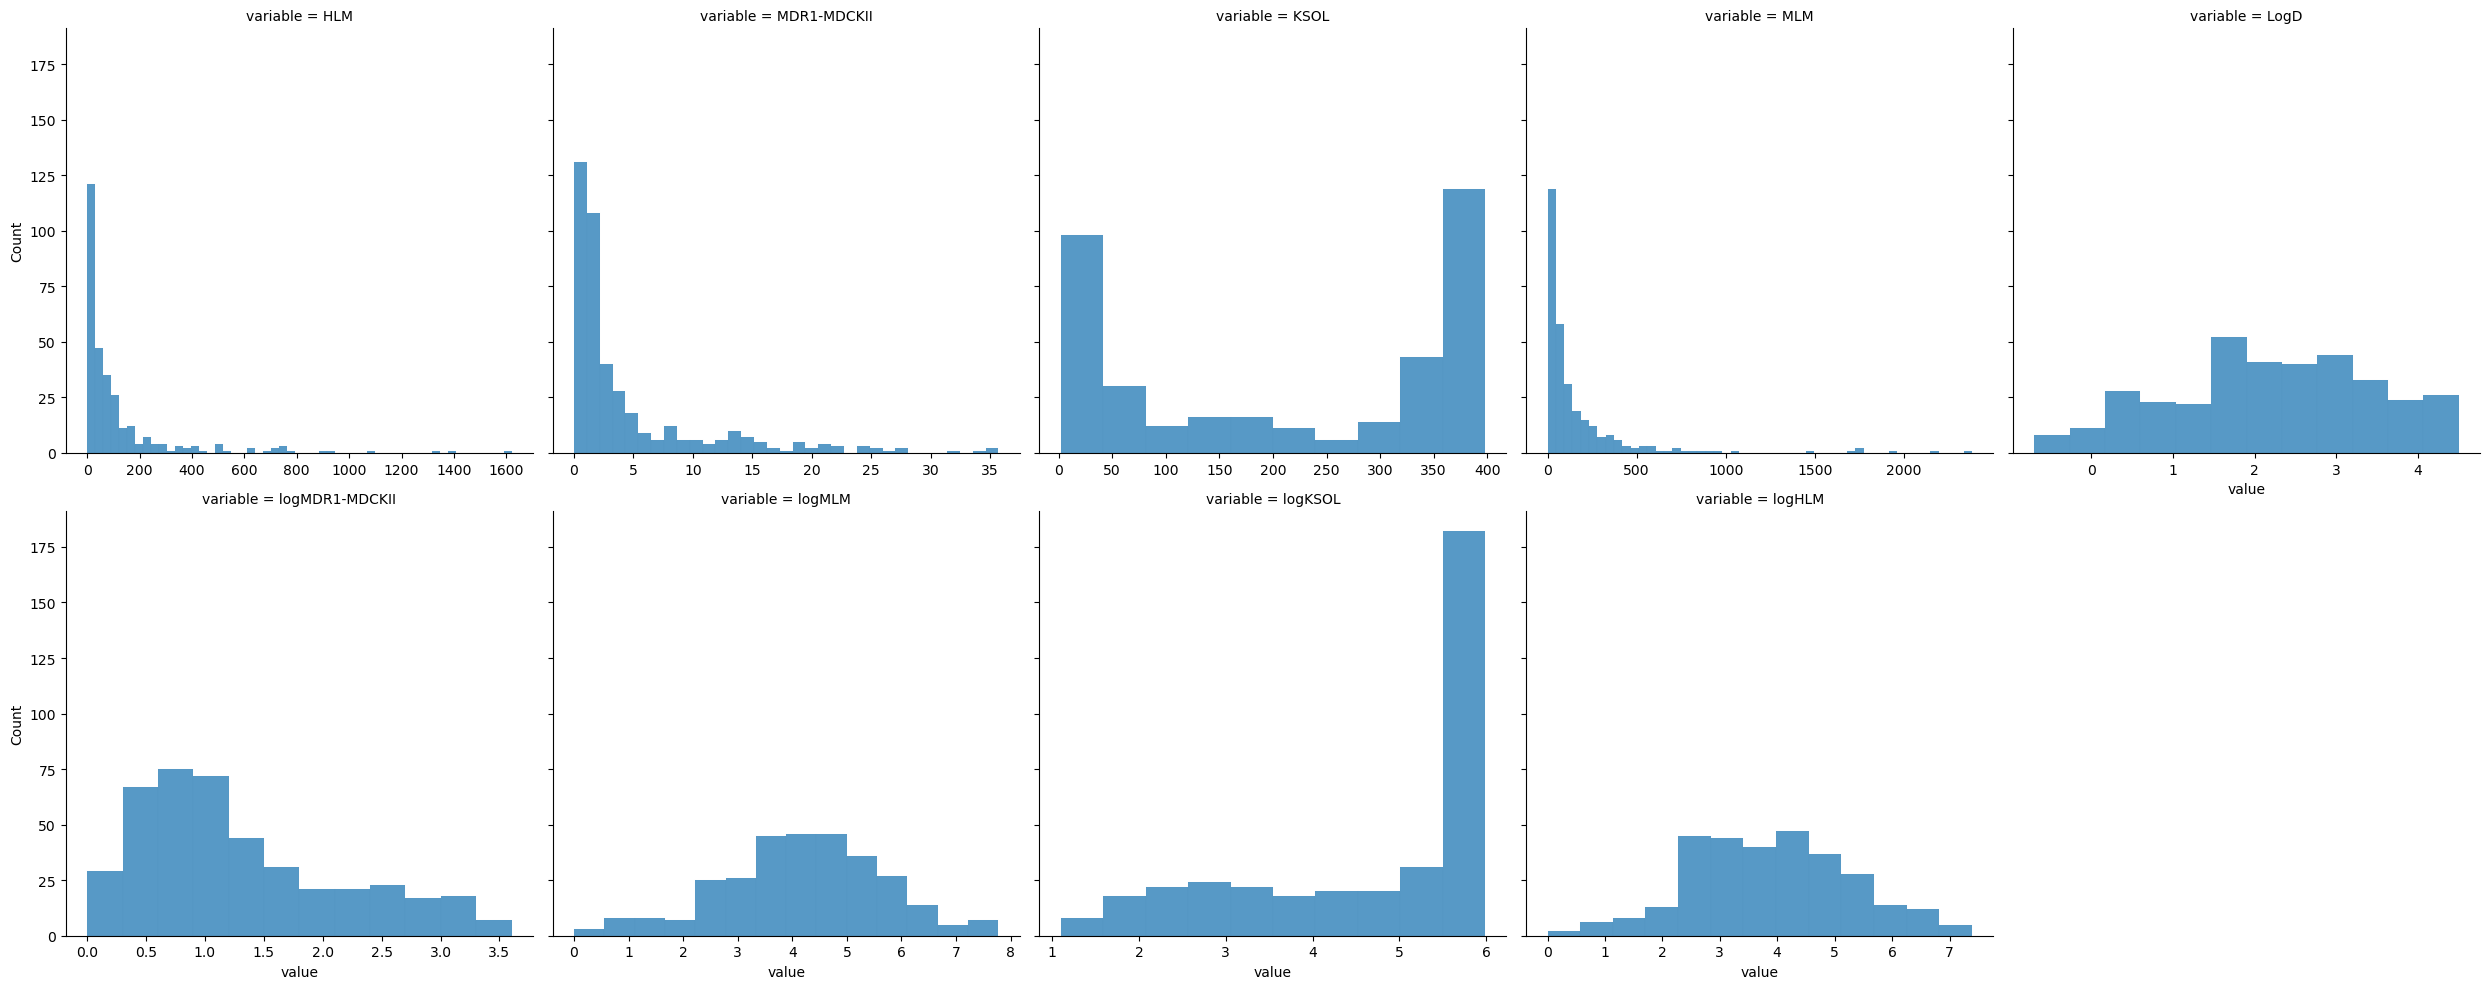

In [17]:

sns.displot(data=train.melt(id_vars='CXSMILES'), x='value', col='variable', 
            common_bins=False,
            facet_kws={'sharex': False}, 
           col_wrap=5)

## Correlations 

First scale the data

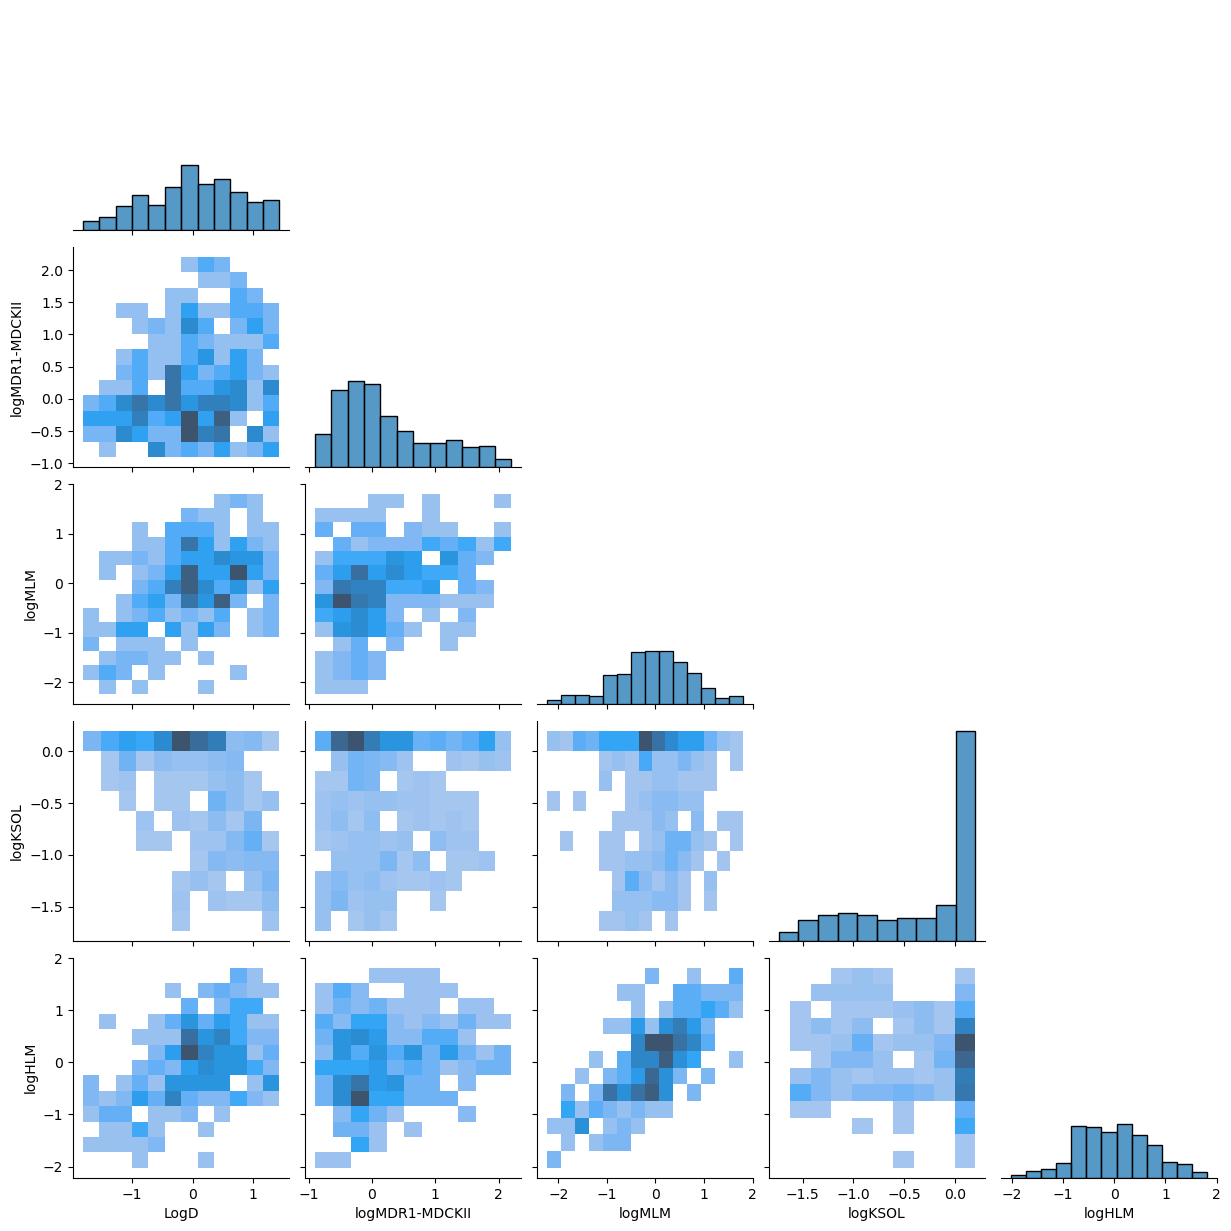

In [21]:
scaler = sk.preprocessing.RobustScaler()
df = train.filter(regex='^[Ll]og')

train_scaled = pd.DataFrame(data=scaler.fit_transform(df), 
                            columns=df.columns) 


sns.pairplot(train_scaled, kind='hist', diag_kind='hist', corner=True)